<a href="https://colab.research.google.com/github/LaraAyrolla/Python-Projects/blob/main/artificial-intelligence/AI-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classificação Multiclasse - Tipos de Drogas**

*   DrugY
*   drugX
*   drugC
*   drugB
*   drugA










In [ ]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
dados = read_csv('/content/drug200.csv',sep=',')
dados

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
dados['Sex'] = pd.factorize(dados['Sex'])[0]
dados['BP'] = pd.factorize(dados['BP'])[0]
dados['Cholesterol'] = pd.factorize(dados['Cholesterol'])[0]
# dados['Drug'] = pd.factorize(dados['Drug'])[0]

dados

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [ ]:
X = dados.values[:, :5]
Y = dados.values[:, 5]


In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)
Y = np_utils.to_categorical(encoded_y)

In [ ]:
X = X.astype('float32')

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.20)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=5, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=100, batch_size=16, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 1.8102 - accuracy: 0.0625 - val_loss: 1.6759 - val_accuracy: 0.2250
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 1.6022 - accuracy: 0.2500 - val_loss: 1.5702 - val_accuracy: 0.2750
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 1.4700 - accuracy: 0.3000 - val_loss: 1.4904 - val_accuracy: 0.3000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 1.4268 - accuracy: 0.3125 - val_loss: 1.4383 - val_accuracy: 0.3500
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 1.3775 - accuracy: 0.3938 - val_loss: 1.3963 - val_accuracy: 0.4500
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 1.3253 - accuracy: 0.4313 - val_loss: 1.3502 - val_accuracy: 0.5000
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 1.2724 - accuracy: 0.5562 - val_loss: 1.3015 - val_accuracy: 0.4750
Epoch 8/100

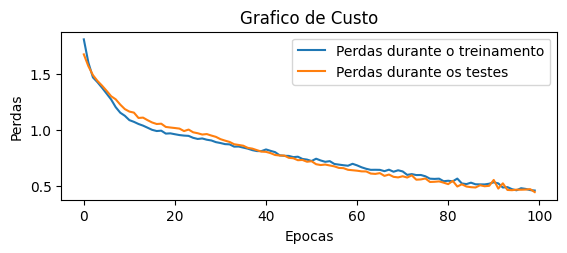

In [ ]:
plt.subplot(211)
plt.title('Grafico de Custo')
plt.plot(history.history['loss'],label= 'Perdas durante o treinamento')
plt.plot(history.history['val_loss'],label= 'Perdas durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show()

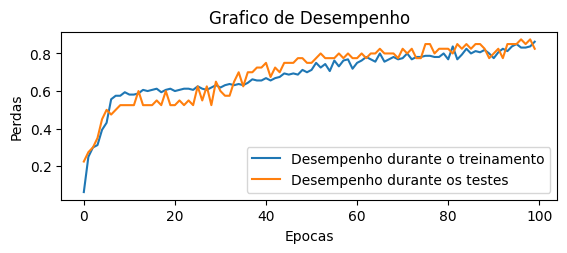

In [ ]:
plt.subplot(212)
plt.title('Grafico de Desempenho')
plt.plot(history.history['accuracy'],label= 'Desempenho durante o treinamento')
plt.plot(history.history['val_accuracy'],label= 'Desempenho durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show()

In [ ]:
ytest

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0.

In [ ]:
# predict probabilities for test set
previsto = model.predict(xtest, verbose=0)


In [ ]:
previsto


array([[6.38997734e-01, 5.87251084e-03, 5.51409721e-02, 4.89864610e-02,
        2.51002282e-01],
       [9.86979663e-01, 1.04004564e-02, 4.78311733e-04, 2.13297014e-03,
        8.59916418e-06],
       [1.85628317e-03, 1.08393259e-01, 6.60453796e-01, 1.54936269e-01,
        7.43604079e-02],
       [9.13701057e-01, 2.59559117e-02, 4.39379215e-02, 1.63496677e-02,
        5.53952486e-05],
       [2.48016305e-02, 3.08696623e-03, 1.06451893e-02, 1.93395000e-02,
        9.42126751e-01],
       [2.65684843e-01, 2.97386140e-01, 1.26855582e-01, 2.28478462e-01,
        8.15949813e-02],
       [1.62382741e-02, 1.80395544e-01, 6.59646213e-01, 1.39002517e-01,
        4.71756188e-03],
       [9.24318790e-01, 3.30833495e-02, 5.46140969e-03, 2.73155402e-02,
        9.82090924e-03],
       [1.23180663e-02, 3.62847419e-03, 3.05761546e-02, 3.07313204e-02,
        9.22746003e-01],
       [9.38424528e-01, 3.22202221e-02, 4.13486641e-03, 2.10552141e-02,
        4.16519446e-03],
       [1.29147500e-01, 4.4111

In [ ]:
print(confusion_matrix(ytest.argmax(axis=1), previsto.argmax(axis=1)))

[[13  0  1  0  1]
 [ 0  3  0  0  0]
 [ 1  0  3  0  0]
 [ 0  0  2  0  1]
 [ 1  0  0  0 14]]


In [ ]:
# ROC AUC
auc = roc_auc_score(ytest, previsto)
print('ROC AUC: %f' % auc)


ROC AUC: 0.979569


In [ ]:
previsto = previsto.round()

In [ ]:
#print("Valores reais: ", ytest)
#print("Valores previsto pela RNA: ", previsto)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(ytest, previsto)))

print('Precision: {:.2f}'.format(precision_score(ytest, previsto, average='micro')))
print('Recall: {:.2f}'.format(recall_score(ytest, previsto, average='micro')))
print('F1-score: {:.2f}\n'.format(f1_score(ytest, previsto, average='micro')))

#relatório com métricas de testes do modelo
from sklearn.metrics import classification_report
print('\nRelatório de classificação\n')
print(classification_report(ytest, previsto, target_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY']))


Accuracy: 0.75

Precision: 0.91
Recall: 0.75
F1-score: 0.82


Relatório de classificação

              precision    recall  f1-score   support

       drugA       1.00      0.87      0.93        15
       drugB       1.00      0.33      0.50         3
       drugC       0.50      0.50      0.50         4
       drugX       0.00      0.00      0.00         3
       drugY       0.93      0.93      0.93        15

   micro avg       0.91      0.75      0.82        40
   macro avg       0.69      0.53      0.57        40
weighted avg       0.85      0.75      0.79        40
 samples avg       0.75      0.75      0.75        40



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
